**Imports and Initialization**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import math

**Target files from your dataset**

In [2]:
image_files = ['img1.png', 'img2.tif', 'img3.tif']
scale_factor = 2

**Bilinear Implementation from Scratch**

In [4]:
def bilinear_scratch(img, scale):
    """
    Performs Bilinear Interpolation using a 2x2 neighborhood.
    Logic: Linear interpolation in X, then in Y.
    """
    h, w = img.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    output = np.zeros((new_h, new_w), dtype=np.uint8)

    # Calculate ratios for inverse mapping
    row_ratio = h / new_h
    col_ratio = w / new_w

    for r in range(new_h):
        for c in range(new_w):
            # 1. Map back to source coordinates (Floating point)
            src_r = r * row_ratio
            src_c = c * col_ratio
            
            # 2. Find the 4 neighboring integer coordinates
            r1 = int(math.floor(src_r))
            r2 = min(r1 + 1, h - 1)
            c1 = int(math.floor(src_c))
            c2 = min(c1 + 1, w - 1)
            
            # 3. Calculate weights (fractional distances)
            dr = src_r - r1
            dc = src_c - c1
            
            # 4. Bilinear Formula
            # Top-row interpolation
            top = (1 - dc) * img[r1, c1] + dc * img[r1, c2]
            # Bottom-row interpolation
            bottom = (1 - dc) * img[r2, c1] + dc * img[r2, c2]
            # Vertical interpolation
            pixel_val = (1 - dr) * top + dr * bottom
            
            output[r, c] = int(pixel_val)
            
    return output

**Verification and Analysis**

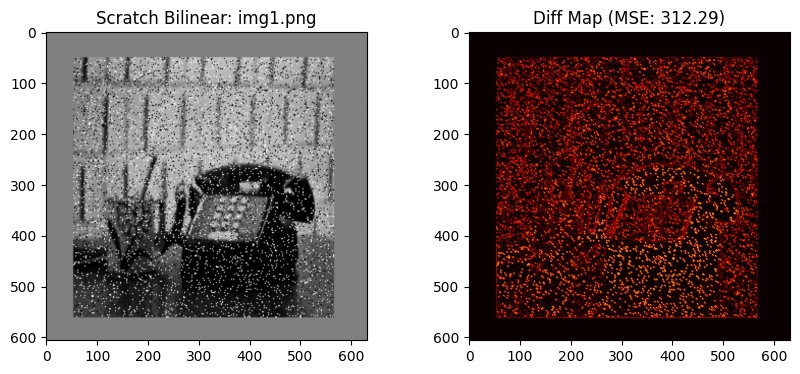

File: img1.png | Time: 7.6333s | MSE: 312.2930


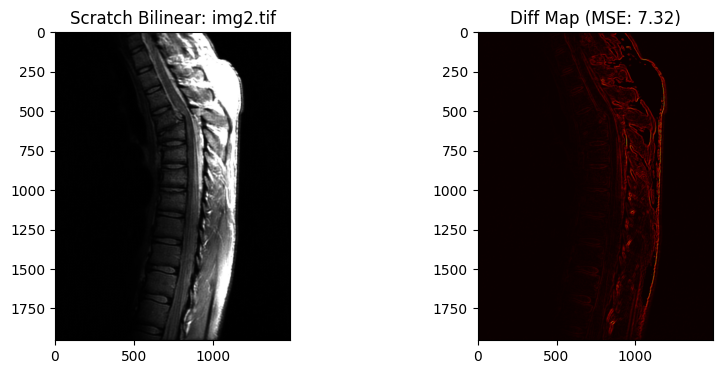

File: img2.tif | Time: 57.7939s | MSE: 7.3208


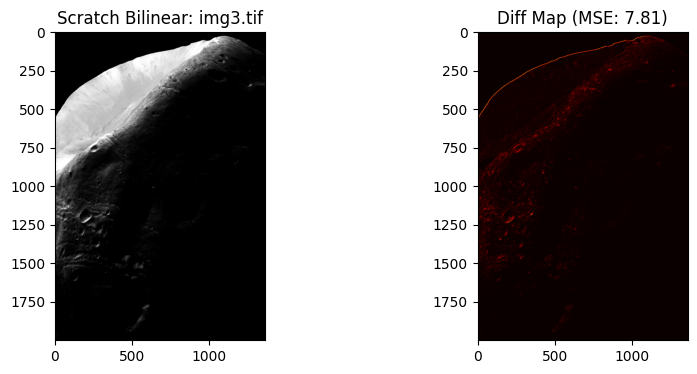

File: img3.tif | Time: 52.7046s | MSE: 7.8131


In [5]:
for file in image_files:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    if img is None: continue
    
    # Run Scratch Implementation
    start = time.time()
    res_scratch = bilinear_scratch(img, scale_factor)
    duration = time.time() - start
    
    # Run OpenCV Reference (INTER_LINEAR)
    res_cv2 = cv2.resize(img, (img.shape[1]*scale_factor, img.shape[0]*scale_factor), 
                         interpolation=cv2.INTER_LINEAR)
    
    # Calculate MSE
    mse = np.mean((res_scratch.astype(float) - res_cv2.astype(float))**2)
    
    # Visual Output
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1); plt.imshow(res_scratch, cmap='gray'); plt.title(f'Scratch Bilinear: {file}')
    plt.subplot(1, 2, 2); plt.imshow(np.abs(res_scratch.astype(int) - res_cv2.astype(int)), cmap='hot')
    plt.title(f'Diff Map (MSE: {mse:.2f})')
    plt.show()
    
    print(f"File: {file} | Time: {duration:.4f}s | MSE: {mse:.4f}")